<a href="https://colab.research.google.com/github/SharmilaDeviR/AI-Enhanced-Question-and-Answer-Session/blob/main/Govbudgetanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving government_budget_large.csv to government_budget_large.csv


Budget Data:
   Year        Category    Amount     Type
0  2011          Grants  18414579  Revenue
1  2001          Grants  49068957  Revenue
2  2014  Social Welfare  21656009  Expense
3  2022  Infrastructure   9126787  Expense
4  2006  Social Welfare  42723676  Expense

Summary statistics:
              Year        Amount
count  5000.000000  5.000000e+03
mean   2011.501600  2.545403e+07
std       6.866952  1.420909e+07
min    2000.000000  1.005808e+06
25%    2006.000000  1.306935e+07
50%    2011.000000  2.576768e+07
75%    2017.250000  3.759616e+07
max    2023.000000  4.999884e+07

Annual Revenue:
Year
2000    2517492879
2001    2837239002
2002    1956171240
2003    2289166091
2004    2079139480
2005    2563980825
2006    2094050900
2007    2415899501
2008    2032927575
2009    2559867071
2010    2742055875
2011    2586132835
2012    2987388420
2013    2004979965
2014    1998596500
2015    1967402105
2016    2646722252
2017    2114490156
2018    2177124569
2019    2200600007
2020    2

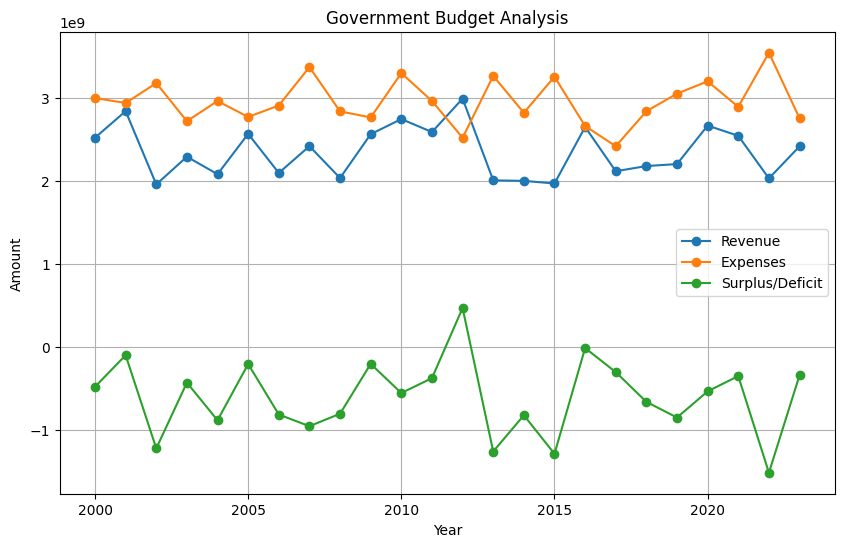

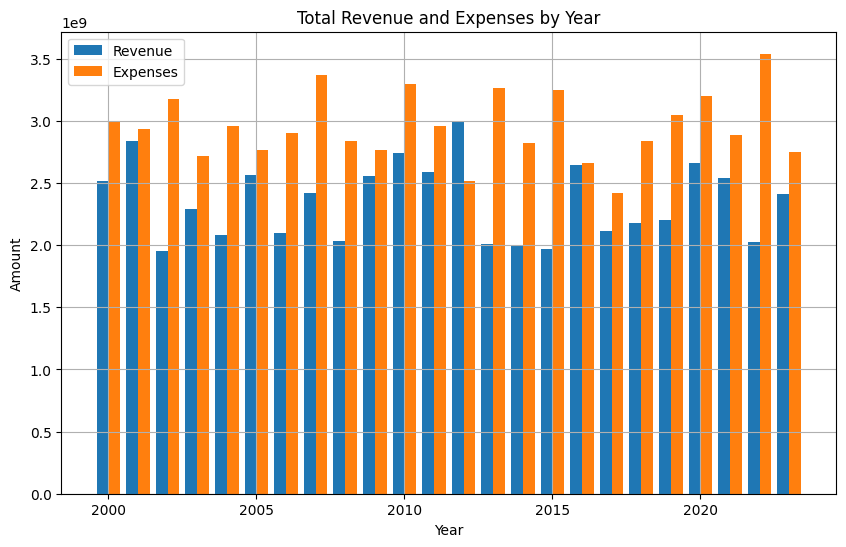

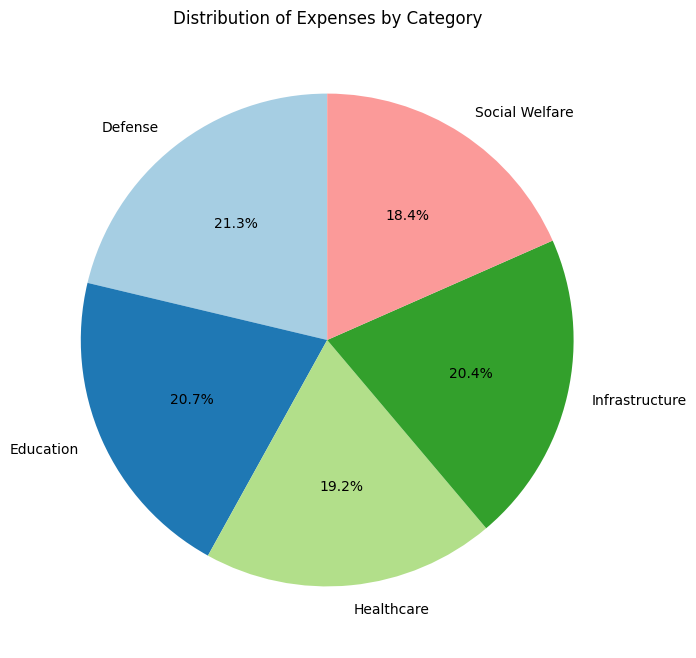

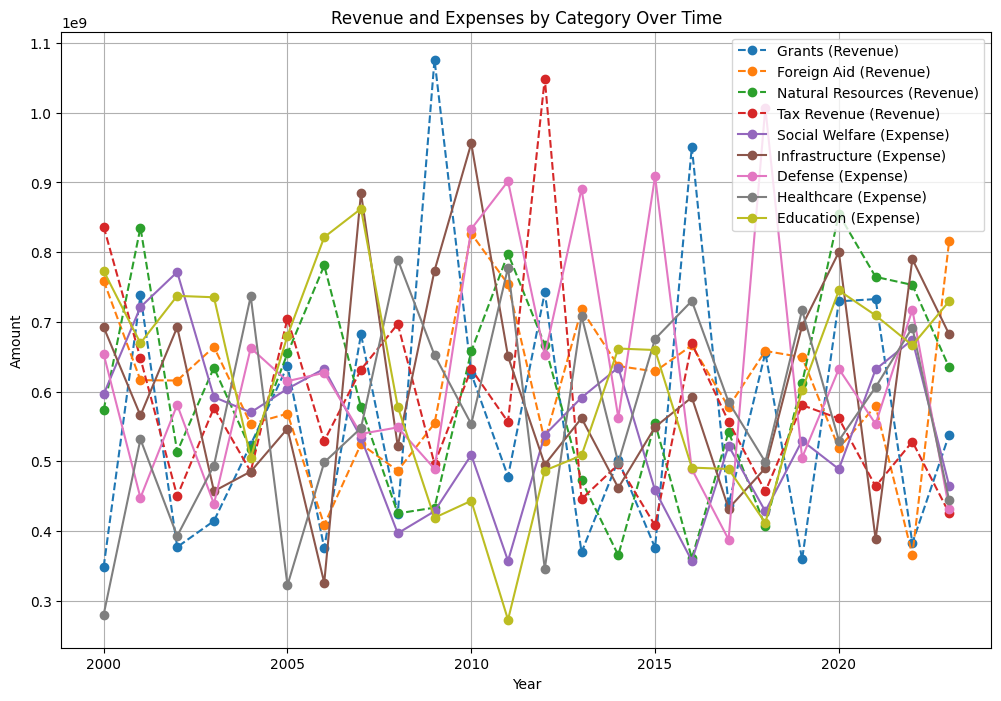

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('government_budget_large.csv')

# Display the first few rows of the dataset
print("Budget Data:")
print(df.head())

# Basic statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

# Separate revenue and expenses
revenue = df[df['Type'] == 'Revenue']
expenses = df[df['Type'] == 'Expense']

# Group by year and sum the amount for each type
annual_revenue = revenue.groupby('Year')['Amount'].sum()
annual_expenses = expenses.groupby('Year')['Amount'].sum()

# Calculate annual surplus or deficit
annual_balance = annual_revenue - annual_expenses

print("\nAnnual Revenue:")
print(annual_revenue)

print("\nAnnual Expenses:")
print(annual_expenses)

print("\nAnnual Surplus/Deficit:")
print(annual_balance)

# Plot 1: Line plot for Revenue, Expenses, and Surplus/Deficit over time
plt.figure(figsize=(10, 6))
plt.plot(annual_revenue, label='Revenue', marker='o')
plt.plot(annual_expenses, label='Expenses', marker='o')
plt.plot(annual_balance, label='Surplus/Deficit', marker='o')
plt.title('Government Budget Analysis')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Bar plot of Total Revenue and Expenses by Year
plt.figure(figsize=(10, 6))
width = 0.4  # Width of bars
years = annual_revenue.index

plt.bar(years - width/2, annual_revenue, width, label='Revenue')
plt.bar(years + width/2, annual_expenses, width, label='Expenses')
plt.title('Total Revenue and Expenses by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Pie Chart for Expense Categories
expense_by_category = expenses.groupby('Category')['Amount'].sum()

plt.figure(figsize=(8, 8))
plt.pie(expense_by_category, labels=expense_by_category.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Expenses by Category')
plt.show()

# Plot 4: Line plot for Revenue and Expenses by Category over time
plt.figure(figsize=(12, 8))

# Plot revenue categories over time
for category in revenue['Category'].unique():
    category_data = revenue[revenue['Category'] == category].groupby('Year')['Amount'].sum()
    plt.plot(category_data, label=f'{category} (Revenue)', linestyle='--', marker='o')

# Plot expense categories over time
for category in expenses['Category'].unique():
    category_data = expenses[expenses['Category'] == category].groupby('Year')['Amount'].sum()
    plt.plot(category_data, label=f'{category} (Expense)', marker='o')

plt.title('Revenue and Expenses by Category Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()
